In [6]:
import numpy as np
A = np.array([[1, 5, 3],
              [4, 6, 6],
              [3, 8, 9]])
B = np.array([[1, 5, 3, 4],
              [4, 5, 7, 8],
              [7, 8, 9, 3]])
C = np.array([[1],
              [4],
              [3]])
D = np.array([[1, 5, 3]])
M = np.matmul(A,B)
# print("A="); print(A)
print("M=")
print(M)
#M = np.matmul(B,A) # Not Working!
M = np.matmul(A,C)
print("M=", M)
#M = np.matmul(C,A) # Not Working!
M = np.matmul(C,D)
print("M=", M)
M = np.matmul(D,C)
print("M=", M)

M=
[[ 42  54  65  53]
 [ 70  98 108  82]
 [ 98 127 146 103]]
M= [[30]
 [46]
 [62]]
M= [[ 1  5  3]
 [ 4 20 12]
 [ 3 15  9]]
M= [[30]]


In [8]:
import numpy as np
A = np.array([[1, 3, 7, 2],
              [5, 8, -9, 0],
              [6, -7, 11, 12]])  
print("A="); print(A)
Atr = np.transpose(A)
print("Transpose of A="); print(Atr)
B = np.array([[1, 5],
            [4, 5],
            [3, 2],
            [7, 8]])
print("B="); print(B)
Btr = np.transpose(B)
print("Transpose of B="); print(Btr)

A=
[[ 1  3  7  2]
 [ 5  8 -9  0]
 [ 6 -7 11 12]]
Transpose of A=
[[ 1  5  6]
 [ 3  8 -7]
 [ 7 -9 11]
 [ 2  0 12]]
B=
[[1 5]
 [4 5]
 [3 2]
 [7 8]]
Transpose of B=
[[1 4 3 7]
 [5 5 2 8]]


In [12]:
import numpy as np
import numpy.linalg as la
A = np.array([[1, 2],
            [3, 4]])
Adet = la.det(A)
print("Adet=",Adet)
B = np.array([[-1, 3, 0],
            [2, 1, -5],
            [1, 4, -2]])
Bdet = la.det(B)
print("Bdet=",Bdet)
# print()

Adet= -2.0000000000000004
Bdet= -21.00000000000001


In [16]:
import numpy as np
import numpy.linalg as la
A = np.array([[1, 2],
            [3, 4]])
Ainv = la.inv(A)
print("Ainv=")
print(Ainv)
B = np.array([[-1, 3, 0],
            [2, 1, -5],
            [1, 4, -2]])
Binv = la.inv(B)
print("Binv=")
print(Binv)

Ainv=
[[-2.   1. ]
 [ 1.5 -0.5]]
Binv=
[[-0.85714286 -0.28571429  0.71428571]
 [ 0.04761905 -0.0952381   0.23809524]
 [-0.33333333 -0.33333333  0.33333333]]


In [21]:
import numpy as np
import numpy.linalg as la
A = np.array([[0, 1],
            [-2, -3]])
Aeig, v = la.eig(A)
print("Aeig=",Aeig)
# print(Aeig)

Aeig= [-1. -2.]


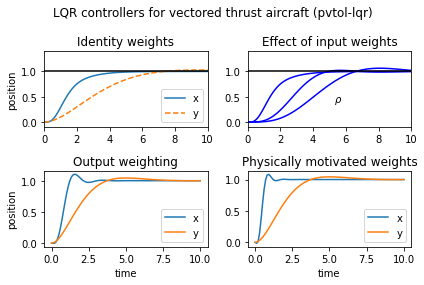

In [1]:
#pvtol_lqr.m - LQR design for vectored thrust aircraft
# RMM, 14 Jan 03
#
# This file works through an LQR based design problem, using the
# planar vertical takeoff and landing (PVTOL) aircraft example from
# Astrom and Murray, Chapter 5.  It is intended to demonstrate the
# basic functionality of the python-control package.
#

import os
import numpy as np
import matplotlib.pyplot as plt  # MATLAB-like plotting functions
import control as ct

#
# System dynamics
#
# These are the dynamics for the PVTOL system, written in state space
# form.
#

# System parameters
m = 4       # mass of aircraft
J = 0.0475  # inertia around pitch axis
r = 0.25    # distance to center of force
g = 9.8     # gravitational constant
c = 0.05    # damping factor (estimated)

# State space dynamics
xe = [0, 0, 0, 0, 0, 0]  # equilibrium point of interest
ue = [0, m * g]  # (note these are lists, not matrices)

# TODO: The following objects need converting from np.matrix to np.array
# This will involve re-working the subsequent equations as the shapes
# See below.

A = np.array(
    [[0, 0, 0, 1, 0, 0],
     [0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 1],
     [0, 0, (-ue[0]*np.sin(xe[2]) - ue[1]*np.cos(xe[2]))/m, -c/m, 0, 0],
     [0, 0, (ue[0]*np.cos(xe[2]) - ue[1]*np.sin(xe[2]))/m, 0, -c/m, 0],
     [0, 0, 0, 0, 0, 0]]
)

# Input matrix
B = np.array(
    [[0, 0], [0, 0], [0, 0],
     [np.cos(xe[2])/m, -np.sin(xe[2])/m],
     [np.sin(xe[2])/m, np.cos(xe[2])/m],
     [r/J, 0]]
)

# Output matrix 
C = np.array([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0]])
D = np.array([[0, 0], [0, 0]])

#
# Construct inputs and outputs corresponding to steps in xy position
#
# The vectors xd and yd correspond to the states that are the desired
# equilibrium states for the system.  The matrices Cx and Cy are the 
# corresponding outputs.
#
# The way these vectors are used is to compute the closed loop system
# dynamics as
#
#   xdot = Ax + B u  =>  xdot = (A-BK)x + K xd
#      u = -K(x - xd)       y = Cx
#
# The closed loop dynamics can be simulated using the "step" command, 
# with K*xd as the input vector (assumes that the "input" is unit size,
# so that xd corresponds to the desired steady state.
#

xd = np.array([[1], [0], [0], [0], [0], [0]])
yd = np.array([[0], [1], [0], [0], [0], [0]])

#
# Extract the relevant dynamics for use with SISO library
#
# The current python-control library only supports SISO transfer
# functions, so we have to modify some parts of the original MATLAB
# code to extract out SISO systems.  To do this, we define the 'lat' and
# 'alt' index vectors to consist of the states that are are relevant
# to the lateral (x) and vertical (y) dynamics.
#

# Indices for the parts of the state that we want
lat = (0, 2, 3, 5)
alt = (1, 4)

# Decoupled dynamics
Ax = A[np.ix_(lat, lat)]
Bx = B[np.ix_(lat, [0])]
Cx = C[np.ix_([0], lat)]
Dx = D[np.ix_([0], [0])]

Ay = A[np.ix_(alt, alt)]
By = B[np.ix_(alt, [1])]
Cy = C[np.ix_([1], alt)]
Dy = D[np.ix_([1], [1])]

# Label the plot
plt.clf()
plt.suptitle("LQR controllers for vectored thrust aircraft (pvtol-lqr)")

#
# LQR design
#

# Start with a diagonal weighting
Qx1 = np.diag([1, 1, 1, 1, 1, 1])
Qu1a = np.diag([1, 1])
K1a, X, E = ct.lqr(A, B, Qx1, Qu1a)

# Close the loop: xdot = Ax - B K (x-xd)
#
# Note: python-control requires we do this 1 input at a time
# H1a = ss(A-B*K1a, B*K1a*concatenate((xd, yd), axis=1), C, D);
# (T, Y) = step_response(H1a, T=np.linspace(0,10,100));
#

# Step response for the first input
H1ax = ct.ss(Ax - Bx @ K1a[np.ix_([0], lat)],
             Bx @ K1a[np.ix_([0], lat)] @ xd[lat, :], Cx, Dx)
Tx, Yx = ct.step_response(H1ax, T=np.linspace(0, 10, 100))

# Step response for the second input
H1ay = ct.ss(Ay - By @ K1a[np.ix_([1], alt)],
             By @ K1a[np.ix_([1], alt)] @ yd[alt, :], Cy, Dy)
Ty, Yy = ct.step_response(H1ay, T=np.linspace(0, 10, 100))

plt.subplot(221)
plt.title("Identity weights")
# plt.plot(T, Y[:,1, 1], '-', T, Y[:,2, 2], '--')
plt.plot(Tx.T, Yx.T, '-', Ty.T, Yy.T, '--')
plt.plot([0, 10], [1, 1], 'k-')

plt.axis([0, 10, -0.1, 1.4])
plt.ylabel('position')
plt.legend(('x', 'y'), loc='lower right')

# Look at different input weightings
Qu1a = np.diag([1, 1])
K1a, X, E = ct.lqr(A, B, Qx1, Qu1a)
H1ax = ct.ss(Ax - Bx @ K1a[np.ix_([0], lat)],
             Bx @ K1a[np.ix_([0], lat)] @ xd[lat, :], Cx, Dx)

Qu1b = (40 ** 2)*np.diag([1, 1])
K1b, X, E = ct.lqr(A, B, Qx1, Qu1b)
H1bx = ct.ss(Ax - Bx @ K1b[np.ix_([0], lat)],
             Bx @ K1b[np.ix_([0], lat)] @ xd[lat, :], Cx, Dx)

Qu1c = (200 ** 2)*np.diag([1, 1])
K1c, X, E = ct.lqr(A, B, Qx1, Qu1c)
H1cx = ct.ss(Ax - Bx @ K1c[np.ix_([0], lat)],
             Bx @ K1c[np.ix_([0], lat)] @ xd[lat, :], Cx, Dx)

T1, Y1 = ct.step_response(H1ax, T=np.linspace(0, 10, 100))
T2, Y2 = ct.step_response(H1bx, T=np.linspace(0, 10, 100))
T3, Y3 = ct.step_response(H1cx, T=np.linspace(0, 10, 100))

plt.subplot(222)
plt.title("Effect of input weights")
plt.plot(T1.T, Y1.T, 'b-')
plt.plot(T2.T, Y2.T, 'b-')
plt.plot(T3.T, Y3.T, 'b-')
plt.plot([0, 10], [1, 1], 'k-')

plt.axis([0, 10, -0.1, 1.4])

# arcarrow([1.3, 0.8], [5, 0.45], -6)
plt.text(5.3, 0.4, r'$\rho$')

# Output weighting - change Qx to use outputs
Qx2 = C.T @ C
Qu2 = 0.1 * np.diag([1, 1])
K2, X, E = ct.lqr(A, B, Qx2, Qu2)

H2x = ct.ss(Ax - Bx @ K2[np.ix_([0], lat)],
            Bx @ K2[np.ix_([0], lat)] @ xd[lat, :], Cx, Dx)
H2y = ct.ss(Ay - By @ K2[np.ix_([1], alt)],
            By @ K2[np.ix_([1], alt)] @ yd[alt, :], Cy, Dy)

plt.subplot(223)
plt.title("Output weighting")
T2x, Y2x = ct.step_response(H2x, T=np.linspace(0, 10, 100))
T2y, Y2y = ct.step_response(H2y, T=np.linspace(0, 10, 100))
plt.plot(T2x.T, Y2x.T, T2y.T, Y2y.T)
plt.ylabel('position')
plt.xlabel('time')
plt.ylabel('position')
plt.legend(('x', 'y'), loc='lower right')

#
# Physically motivated weighting
#
# Shoot for 1 cm error in x, 10 cm error in y.  Try to keep the angle
# less than 5 degrees in making the adjustments.  Penalize side forces
# due to loss in efficiency.
#

Qx3 = np.diag([100, 10, 2*np.pi/5, 0, 0, 0])
Qu3 = 0.1*np.diag([1, 10])
K3, X, E = ct.lqr(A, B, Qx3, Qu3)

H3x = ct.ss(Ax - Bx @ K3[np.ix_([0], lat)],
            Bx @ K3[np.ix_([0], lat)] @ xd[lat, :], Cx, Dx)
H3y = ct.ss(Ay - By @ K3[np.ix_([1], alt)],
            By @ K3[np.ix_([1], alt)] @ yd[alt, :], Cy, Dy)
plt.subplot(224)
# step_response(H3x, H3y, 10)
T3x, Y3x = ct.step_response(H3x, T=np.linspace(0, 10, 100))
T3y, Y3y = ct.step_response(H3y, T=np.linspace(0, 10, 100))
plt.plot(T3x.T, Y3x.T, T3y.T, Y3y.T)
plt.title("Physically motivated weights")
plt.xlabel('time')
plt.legend(('x', 'y'), loc='lower right')
plt.tight_layout()

if 'PYCONTROL_TEST_EXAMPLES' not in os.environ:
    plt.show()